In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import utils

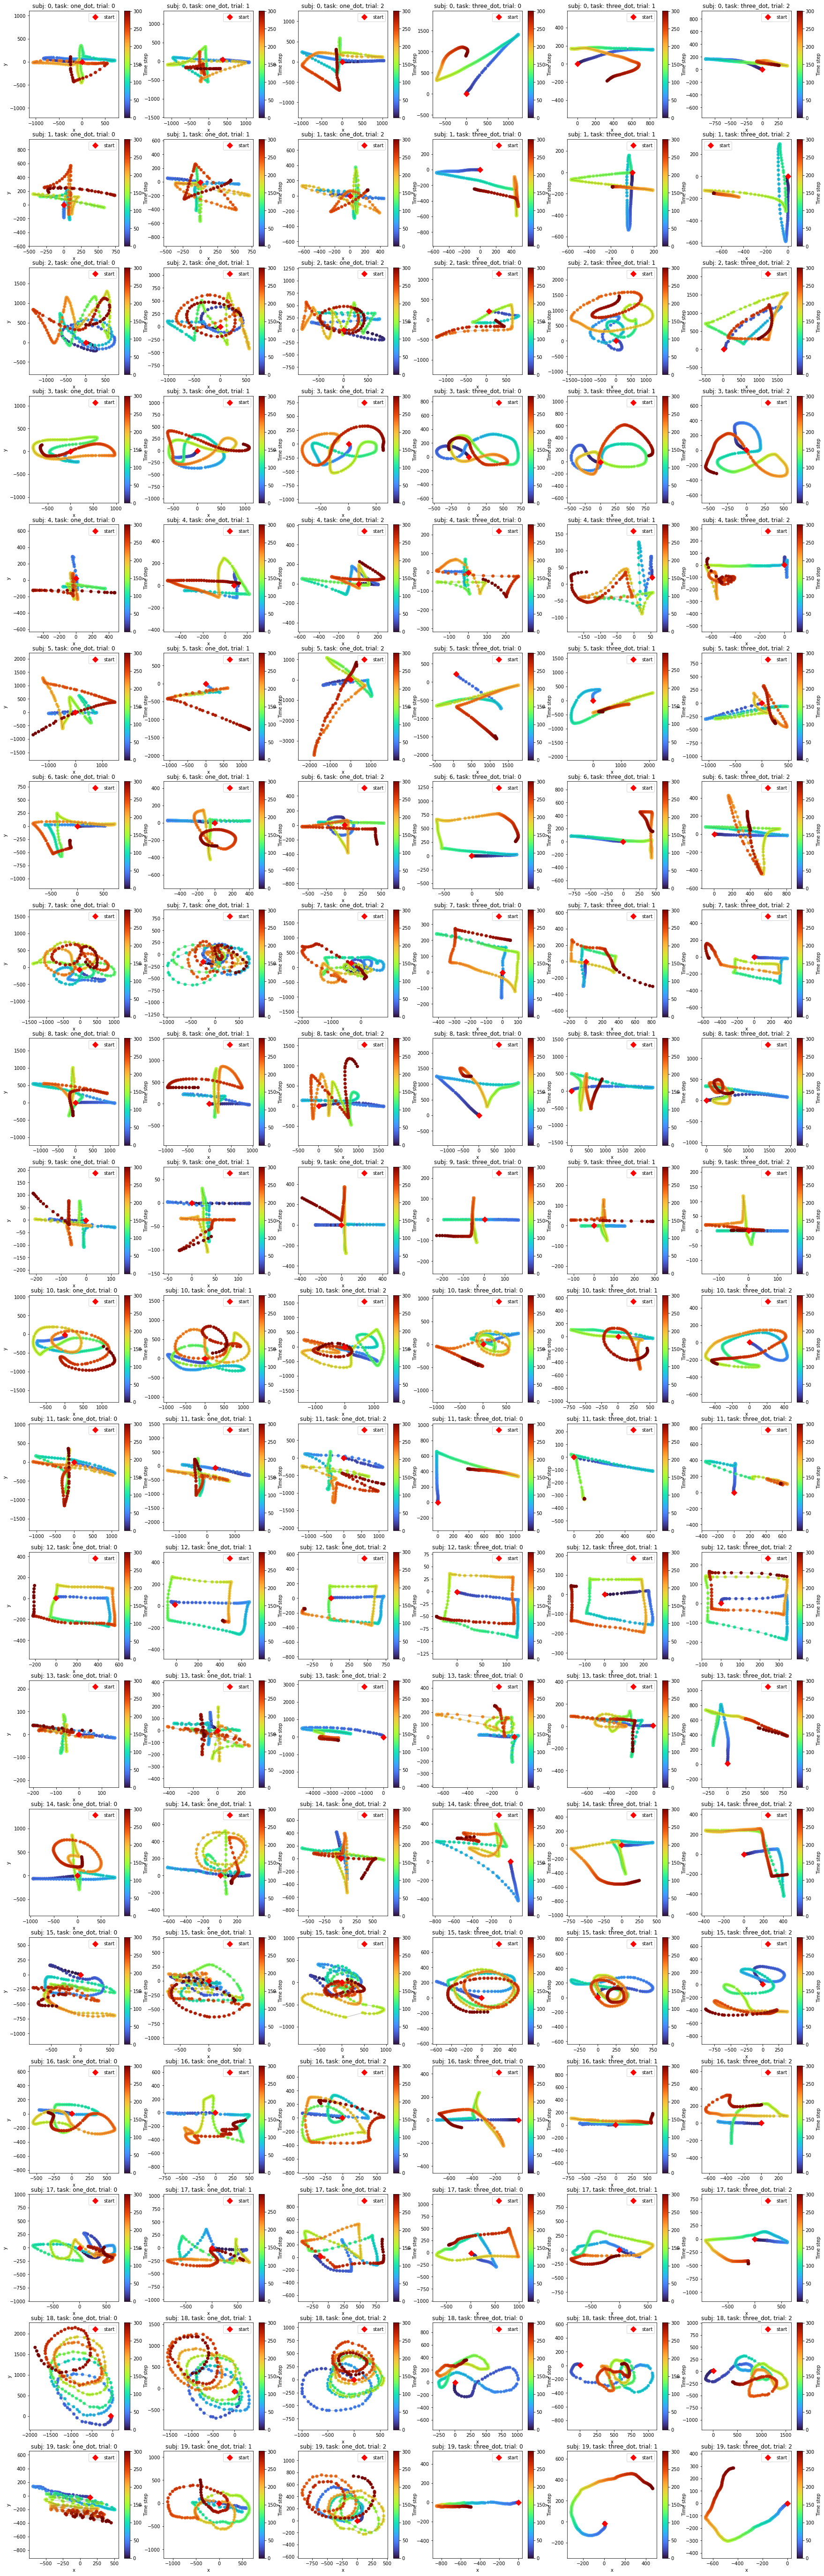

In [55]:
subjs = utils.ExpInfo.getSubjIDs()[0:20]
tasks = utils.ExpInfo.taskName[0:2]
nTrial = 3

fig, ax = plt.subplots(len(subjs), nTrial*len(tasks), figsize=(nTrial*5*len(tasks), len(subjs)*5))

for iSubj, subj in enumerate(subjs):
    for iTask, task in enumerate(tasks):        
        df_beh = utils.LoadData.behaviorData(subj, task)
        df_beh_noiseFree = df_beh.query('`actual control`==0.8 and `angular bias`==0')
        for iTrial in range(nTrial):
            df = utils.LoadData.mouseMovement(subj, task, df_beh_noiseFree['trial no.'].iloc[iTrial])
            x = df['x-shift'].values.cumsum()
            y = df['y-shift'].values.cumsum()
            iax =  ax[iSubj, iTrial+iTask*nTrial]
            utils.Plot.traj_withColour(x, y, fig, iax)
            iax.set_title('subj: {}, task: {}, trial: {}'.format(iSubj, task, iTrial))
                        
        # for i, trialno in enumerate(df_beh_noiseFree['trial no.'].values):
        #     df = utils.LoadData.mouseMovement(subj, task, trialno)
        #     x = df['x-shift'].values.cumsum()
        #     y = df['y-shift'].values.cumsum()
        #     utils.Plot.traj_withColour(x, y, fig, ax[i])

In [15]:
df

,trialno,frameCounter,x-shift,y-shift,dot-x,dot-y,group,subjID
4212,15.0,18.0,2.8,0.0,962.715275,540.683581,H,K-Reg-H-10
4213,15.0,19.0,9.6,0.0,972.028643,543.011923,H,K-Reg-H-10
4214,15.0,20.0,18.0,0.0,989.491208,538.646281,H,K-Reg-H-10
4215,15.0,21.0,29.2,0.0,1017.988698,532.279724,H,K-Reg-H-10
4216,15.0,22.0,33.6,0.4,1050.863796,525.326456,H,K-Reg-H-10
...,...,...,...,...,...,...,...,...
4508,15.0,314.0,-2.4,20.0,1007.526031,1059.930616,H,K-Reg-H-10
4509,15.0,315.0,-2.4,14.4,1003.153445,1060.000000,H,K-Reg-H-10
4510,15.0,316.0,-2.0,12.4,999.648577,1060.000000,H,K-Reg-H-10
4511,15.0,317.0,0.0,13.6,998.449478,1060.000000,H,K-Reg-H-10


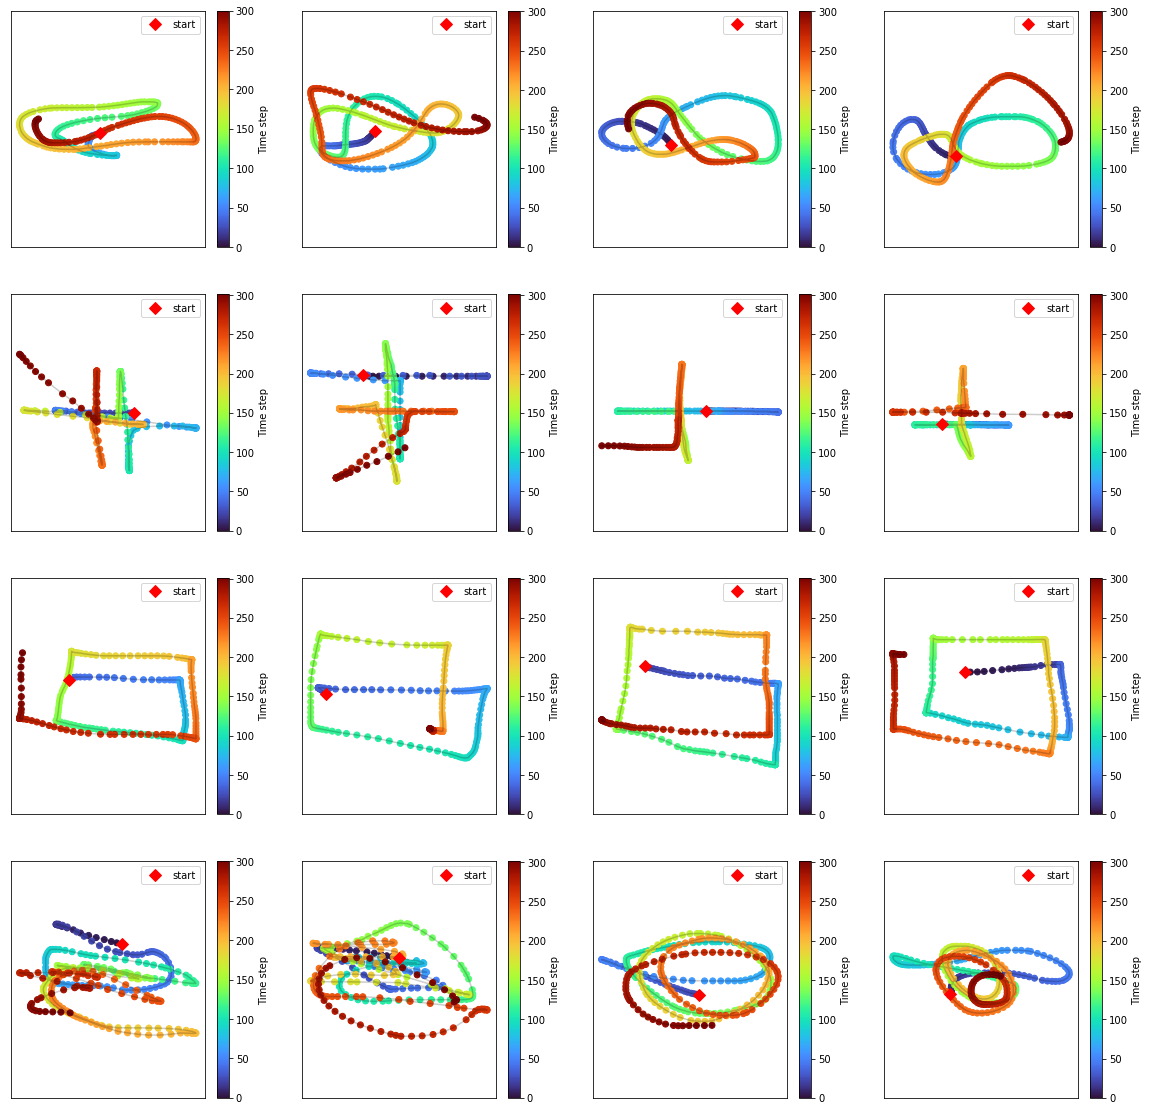

In [68]:
subjs = utils.ExpInfo.getSubjIDs()
subjs = [subjs[i] for i in [3, 9, 12, 15]]
tasks = utils.ExpInfo.taskName[0:2]
nTrial = 2

fig, ax = plt.subplots(len(subjs), nTrial*len(tasks), figsize=(nTrial*5*len(tasks), len(subjs)*5))

for iSubj, subj in enumerate(subjs):
    for iTask, task in enumerate(tasks):        
        df_beh = utils.LoadData.behaviorData(subj, task)
        df_beh_noiseFree = df_beh.query('`actual control`==0.8 and `angular bias`==0')
        for iTrial in range(nTrial):
            df = utils.LoadData.mouseMovement(subj, task, df_beh_noiseFree['trial no.'].iloc[iTrial])
            x = df['x-shift'].values.cumsum()
            y = df['y-shift'].values.cumsum()
            iax =  ax[iSubj, iTrial+iTask*nTrial]
            utils.Plot.traj_withColour(x, y, fig, iax)
            iax.set(xticks=[], yticks=[], xticklabels=[], yticklabels=[], xlabel='', ylabel='')


                        
        # for i, trialno in enumerate(df_beh_noiseFree['trial no.'].values):
        #     df = utils.LoadData.mouseMovement(subj, task, trialno)
        #     x = df['x-shift'].values.cumsum()
        #     y = df['y-shift'].values.cumsum()
        #     utils.Plot.traj_withColour(x, y, fig, ax[i])

In [62]:
filepath = utils.Save.savepath('vis_traj_example', 'traj_example.pdf')
fig.savefig(filepath)

In [61]:
filepath

'/home/acercyc/projects/Keio Testing_analysis/data/vis_traj_example/traj_example.pdf'